# I'll use Linear Regression to predict Medical costs

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv("data/insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


All Predictors names are self-explanatory except bmi,

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

## Exploratory Data Analysis

In [3]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<AxesSubplot:>

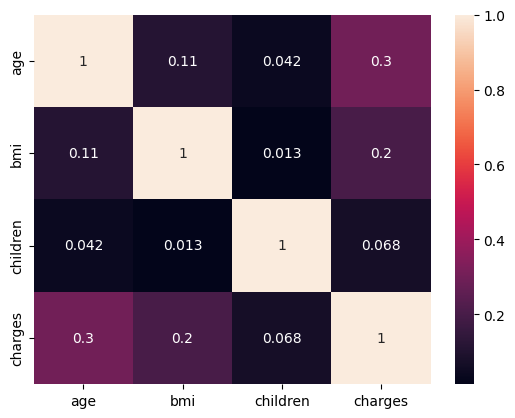

In [23]:
sns.heatmap(data.corr(), annot= True)

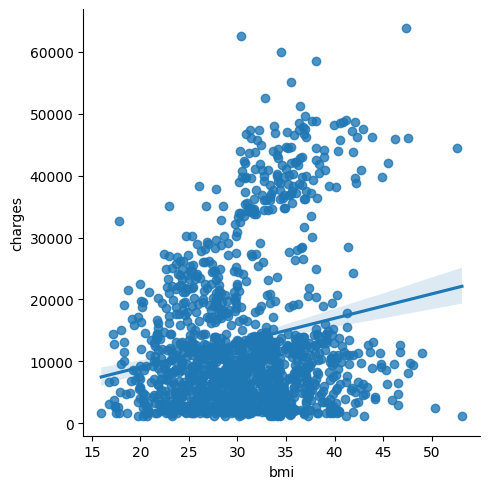

In [15]:
sns.lmplot(x = 'bmi', y = 'charges',data = data)
plt.show()

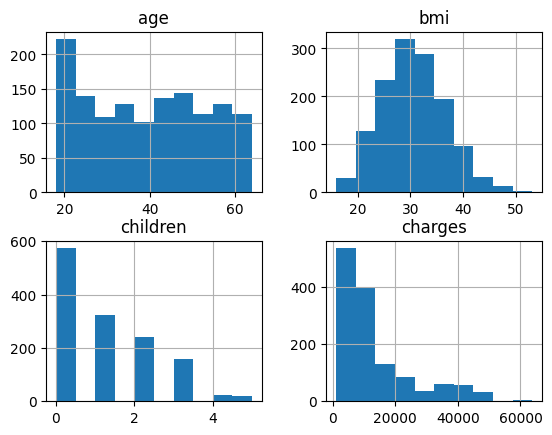

In [22]:
data.hist();

<AxesSubplot:xlabel='smoker', ylabel='charges'>

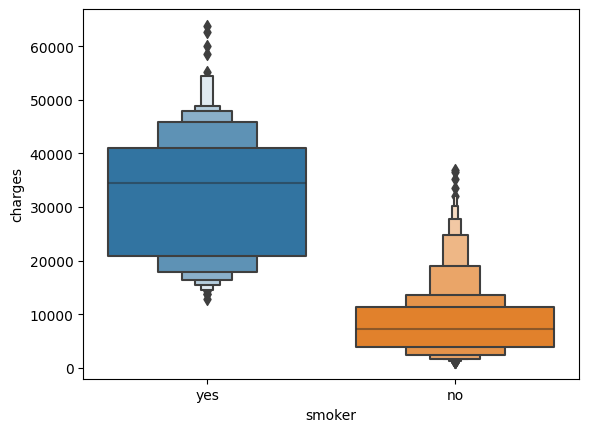

In [24]:
sns.boxenplot(x = 'smoker', y = 'charges', data = data)

<AxesSubplot:xlabel='age', ylabel='charges'>

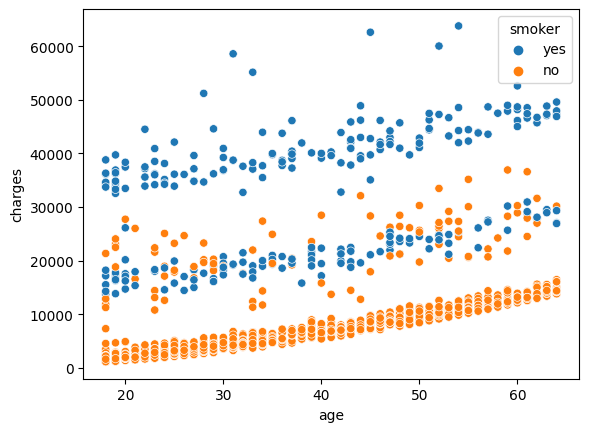

In [30]:
sns.scatterplot(x = 'age', y = 'charges', data = data, hue = 'smoker')

/home/zein/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='smoker', ylabel='count'>

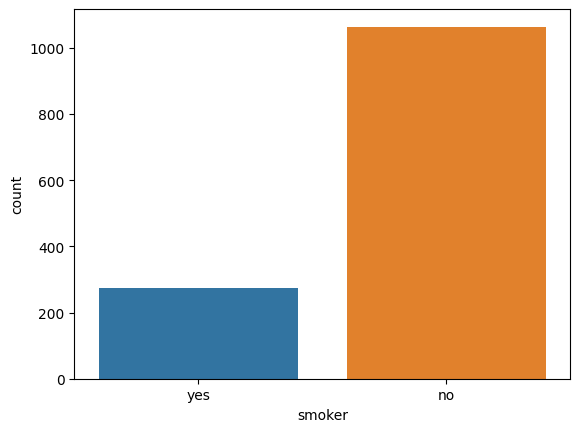

In [31]:
sns.countplot(data['smoker'])

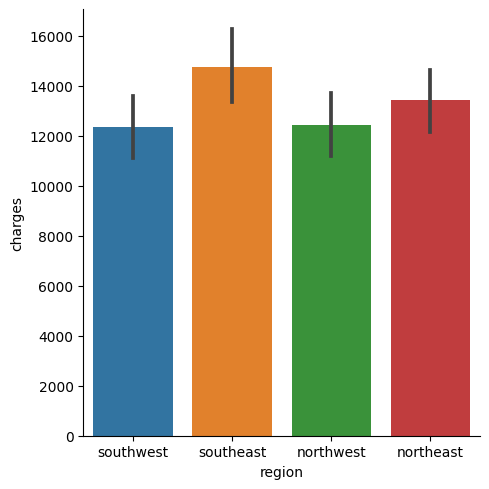

In [35]:
sns.catplot(x = 'region', y = 'charges', data = data, kind = 'bar')

In [40]:
data.groupby('region').charges.mean()

region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64

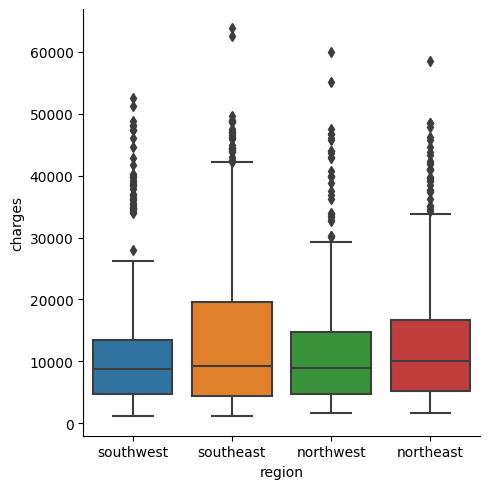

In [38]:
sns.catplot(x = 'region', y = 'charges', data = data, kind = 'box')

In [59]:
data.groupby('region').charges.agg(['mean', 'max', 'min'])

,mean,max,min
region,,,
northeast,13406.384516,58571.07448,1694.7964
northwest,12417.575374,60021.39897,1621.3402
southeast,14735.411438,63770.42801,1121.8739
southwest,12346.937377,52590.82939,1241.5650


<AxesSubplot:xlabel='sex', ylabel='charges'>

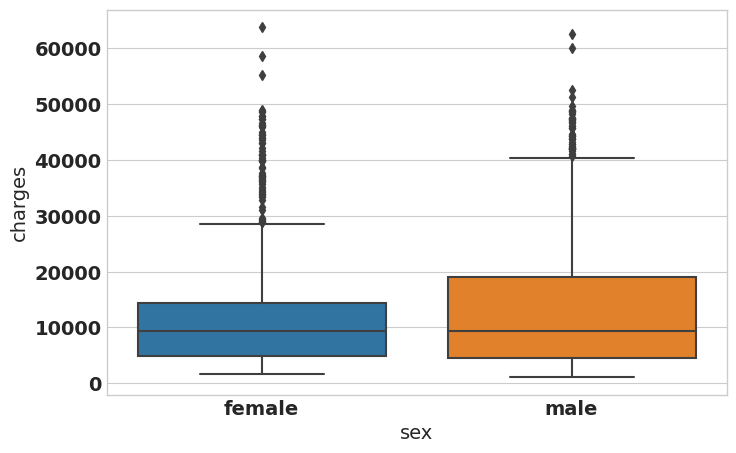

In [47]:
sns.boxplot(x = 'sex', y = 'charges', data = data)

/home/zein/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

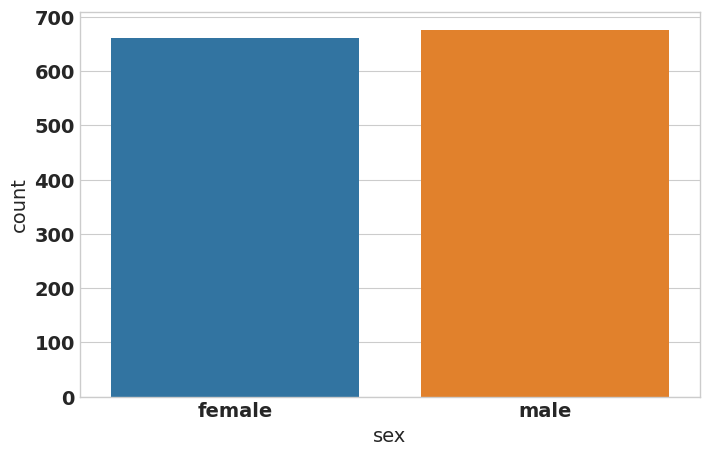

In [49]:
sns.countplot(data['sex'])

<AxesSubplot:xlabel='children', ylabel='charges'>

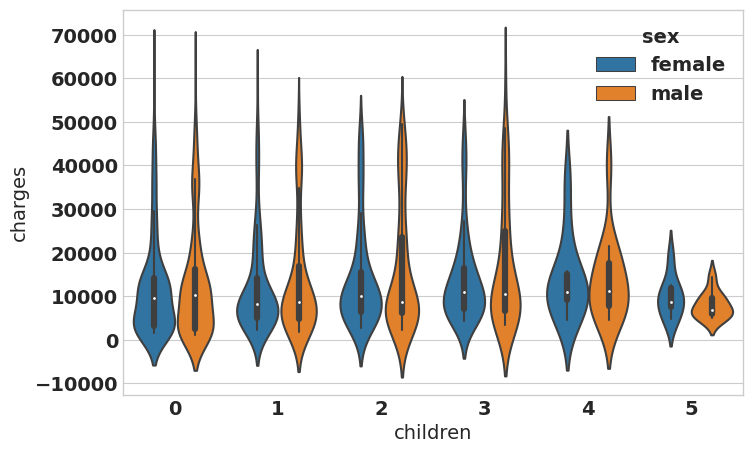

In [50]:
sns.violinplot(x = 'children', y ='charges', hue = 'sex', data = data)

In [53]:
data.groupby('children').children.count()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

Text(0.5, 1.0, 'Log')

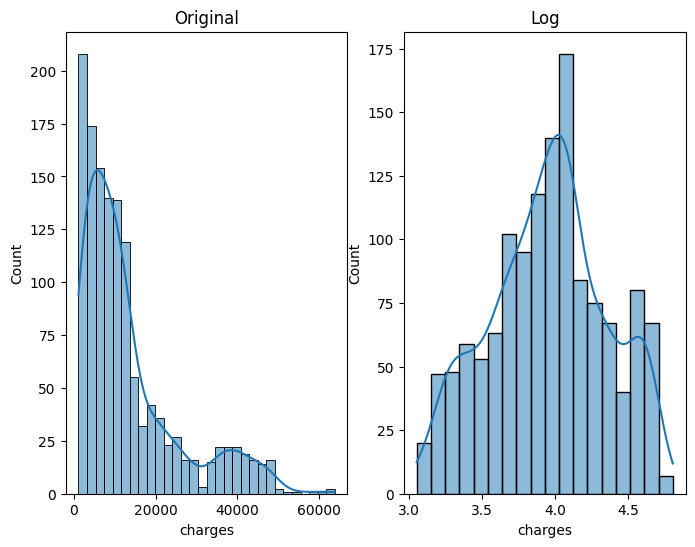

In [44]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (8, 6))
sns.histplot(data['charges'], ax = ax1, kde= True)
ax1.set_title("Original")
sns.histplot(np.log10(data['charges']), ax = ax2, kde= True)
ax2.set_title("Log")

## Observations :

1) Target isn't normally distributed

2) No multicollinearity between variables

3) Smokers have higher costs

4) Southwest region has a higher mean of costs

### Data Preprocessing 

#### Hot Encoding Categorical variables

In [83]:
categorical = ['sex','children', 'smoker', 'region']
df = pd.get_dummies(data = data, prefix = 'E', prefix_sep='_',
               columns = categorical,
               drop_first =True,
              dtype='int8')

In [84]:
df.head()

,age,bmi,charges,E_male,E_1,E_2,E_3,E_4,E_5,E_yes,E_northwest,E_southeast,E_southwest
0,19,27.900,16884.92400,0,0,0,0,0,0,1,0,0,1
1,18,33.770,1725.55230,1,1,0,0,0,0,0,0,1,0
2,28,33.000,4449.46200,1,0,0,1,0,0,0,0,1,0
3,33,22.705,21984.47061,1,0,0,0,0,0,0,1,0,0
4,32,28.880,3866.85520,1,0,0,0,0,0,0,1,0,0


#### Transforming the Target by applying the Log Transform

<AxesSubplot:xlabel='charges', ylabel='Count'>

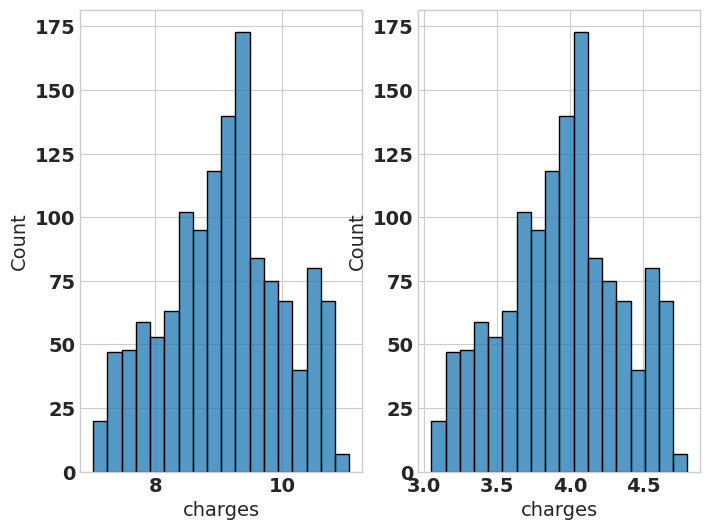

In [87]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (8, 6))

sns.histplot(np.log(df['charges']), ax = ax1)

sns.histplot(np.log10(df['charges']), ax = ax2)

In [88]:
df['charges'] = np.log10(df['charges'])

<AxesSubplot:xlabel='bmi'>

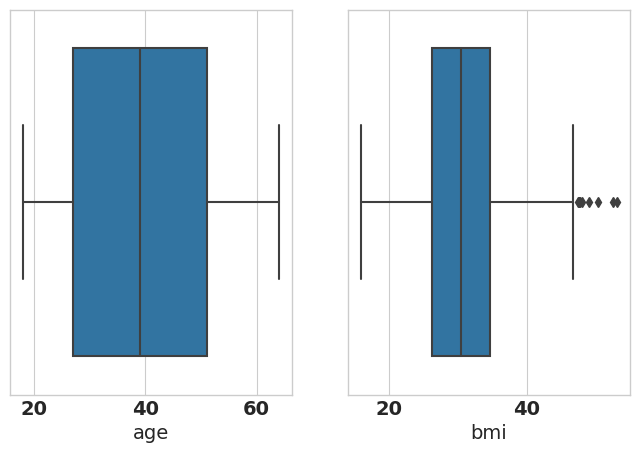

In [92]:
plt.subplot(1, 2, 1)
sns.boxplot(x = df['age'])

plt.subplot(1,2,2)
sns.boxplot(x = df['bmi'])

#### Given that both bmi and age are normally distributed, I'll scale them using Standardization

#### $Note$ : To avoid data leakage I'll split the data before feature scaling

In [94]:
X = df.loc[:, df.columns != 'charges']
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [96]:
scaler=StandardScaler()
X_train['bmi'] = scaler.fit_transform(X_train[['bmi']])
X_test['bmi'] = scaler.transform(X_test[['bmi']])

X_train['age'] = scaler.fit_transform(X_train[['age']])
X_test['age'] = scaler.transform(X_test[['age']])

In [99]:
X_train.describe()

,age,bmi,E_male,E_1,E_2,E_3,E_4,E_5,E_yes,E_northwest,E_southeast,E_southwest
count,9.360000e+02,9.360000e+02,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000
mean,2.030664e-16,1.764970e-16,0.490385,0.244658,0.183761,0.108974,0.018162,0.013889,0.200855,0.240385,0.271368,0.250000
std,1.000535e+00,1.000535e+00,0.500175,0.430114,0.387496,0.311774,0.133610,0.117092,0.400854,0.427545,0.444903,0.433244
min,-1.495644e+00,-2.327075e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.713472e-01,-7.161272e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.667934e-03,-5.563858e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.588460e-01,6.919684e-01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.250000
max,1.786372e+00,3.737720e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [100]:
X_test.describe()

,age,bmi,E_male,E_1,E_2,E_3,E_4,E_5,E_yes,E_northwest,E_southeast,E_southwest
count,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000
mean,0.058043,0.070713,0.539801,0.236318,0.169154,0.136816,0.019900,0.012438,0.213930,0.248756,0.273632,0.226368
std,1.006937,1.108014,0.499034,0.425349,0.375355,0.344081,0.139832,0.110967,0.410589,0.432831,0.446378,0.419002
min,-1.495644,-2.472060,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.853510,-0.738172,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.145364,0.044410,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.858846,0.721432,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.786372,3.830985,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Now it's time for our Linear Regression model

In [102]:
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7677693685737877

In [106]:
prediction = model.predict(X_test)
mse = mean_squared_error(prediction, y_test)
mse

0.03895268151593436

/home/zein/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


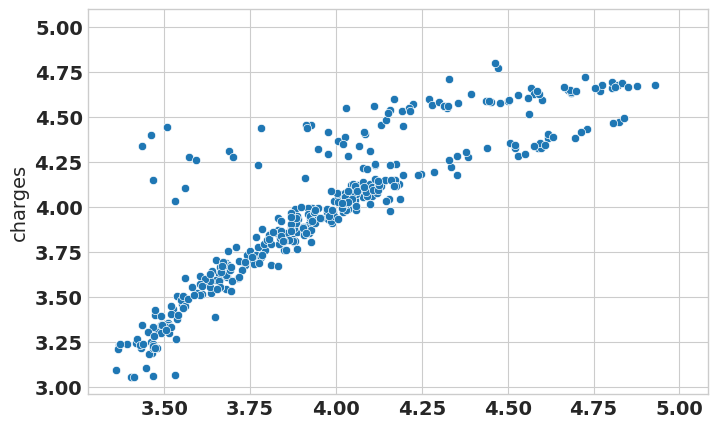

In [109]:
sns.scatterplot(prediction, y_test)
plt.plot((5,5), (5, 5), c = 'r')